# Compare Stanford and Operator QC Criteria
Code author: Sahar H. El Abbadi
Date started: 2022-03-02
Date last edited: 2022-03-02

# Data Description

Metered data for all airplane testing days is saved in the directory "daily_meter_data". Generate by Philippine Burdeau from Coriolis meter raw data and cleaned in the data processing pipeline.

Columns:
- Date and time are in UTC
- Release rate is in kg/h
- Coriolis Meter (for sensor and transmitter identification numbers and serial numbers, see methods documentation):
    - Baby Corey refers to CMFS015H meter
    - Mama Corey refers to CMF050M meter
    - Papa Corey refres to CMFS150M meter
- QC Flags:
    - 0: no QC flag, original data is good quality
    - 1: non-testing period
    - 2: original data missing, filled as described in data analysis section of methods documentation
    - 3: original data value is below accuracy threshold and replaced with NA


In [1]:
from methods_analysis import load_flight_days, generate_daily_releases, plot_daily_releases

# load operator flight days:
cm_flight_days, ghg_flight_days, kairos_flight_days, mair_flight_days, sciav_flight_days = load_flight_days()


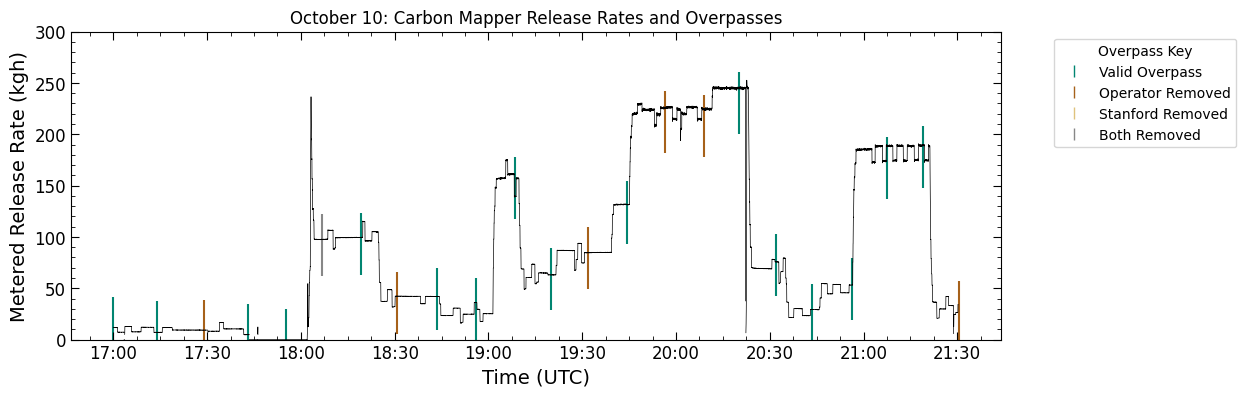

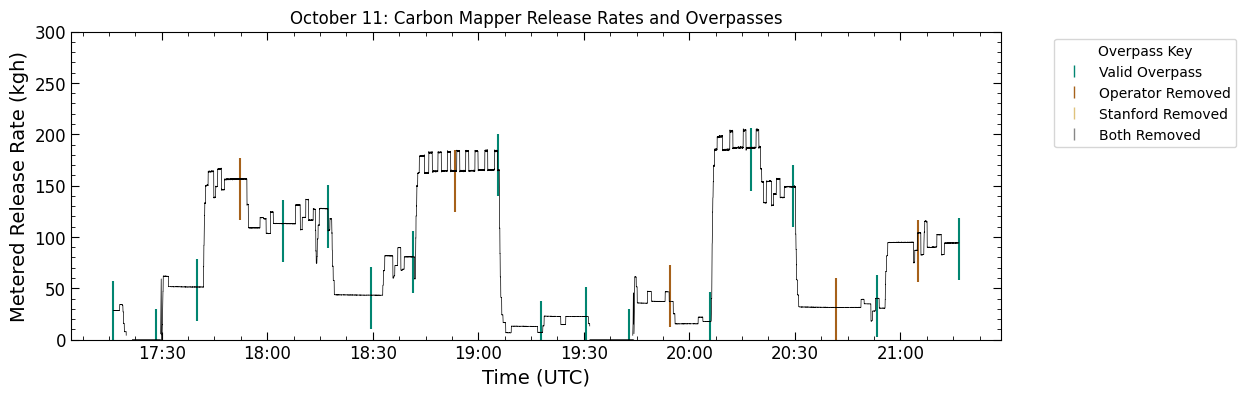

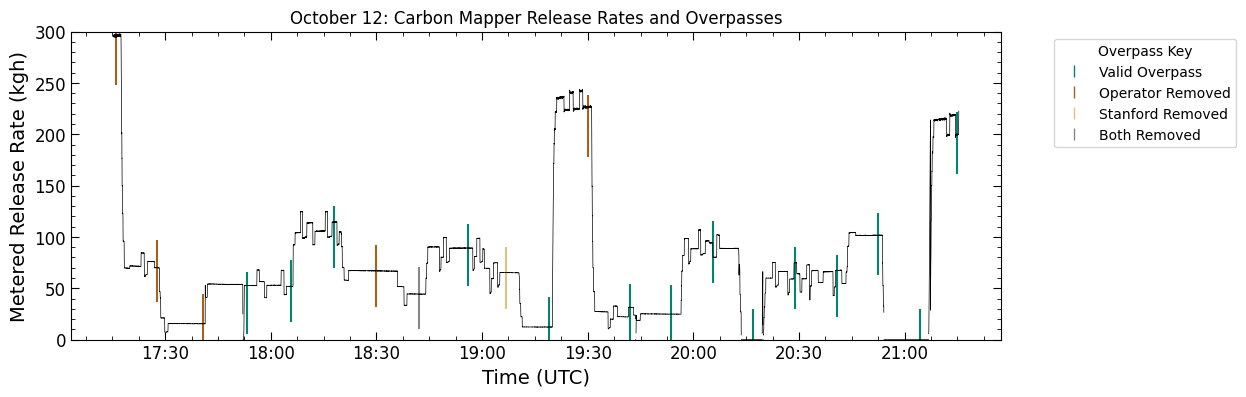

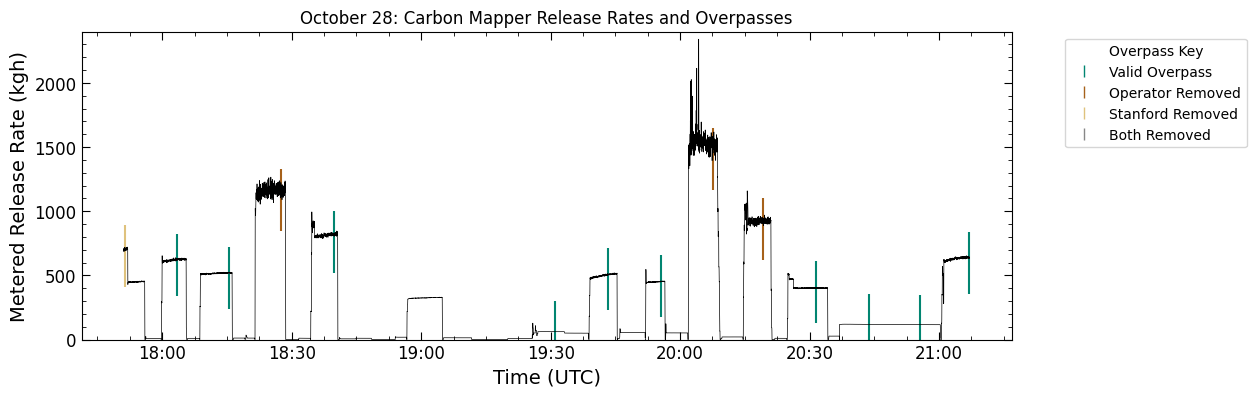

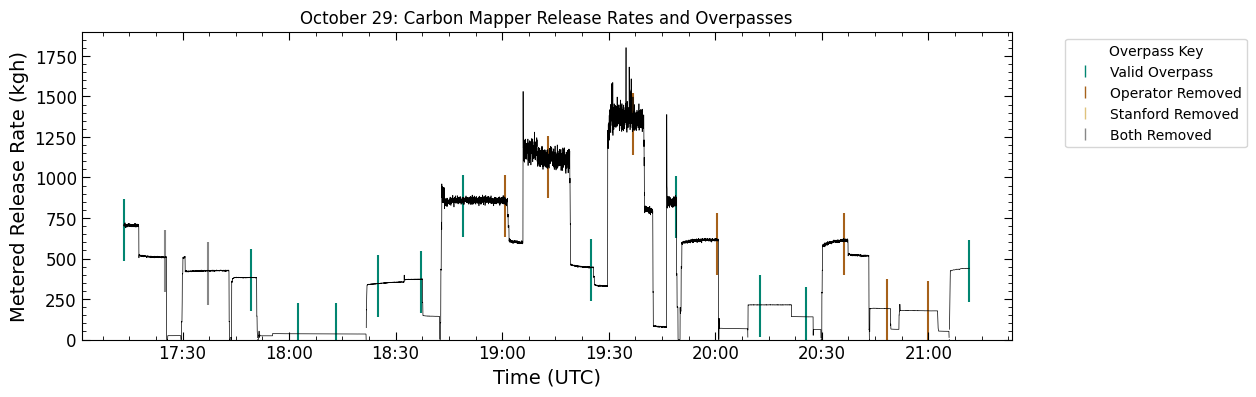

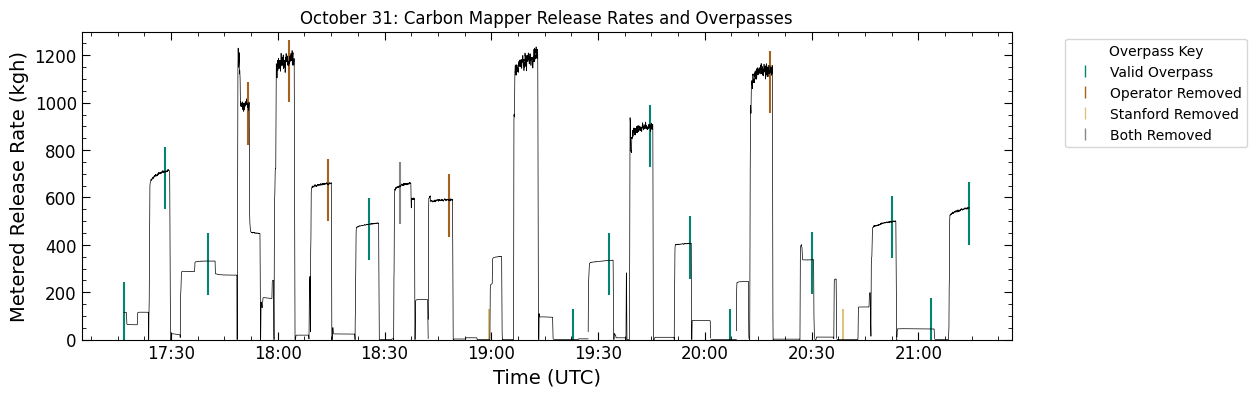

In [2]:
operator = 'Carbon Mapper'
cm_releases = generate_daily_releases(cm_flight_days)
plot_daily_releases(operator, cm_flight_days, cm_releases, 1)

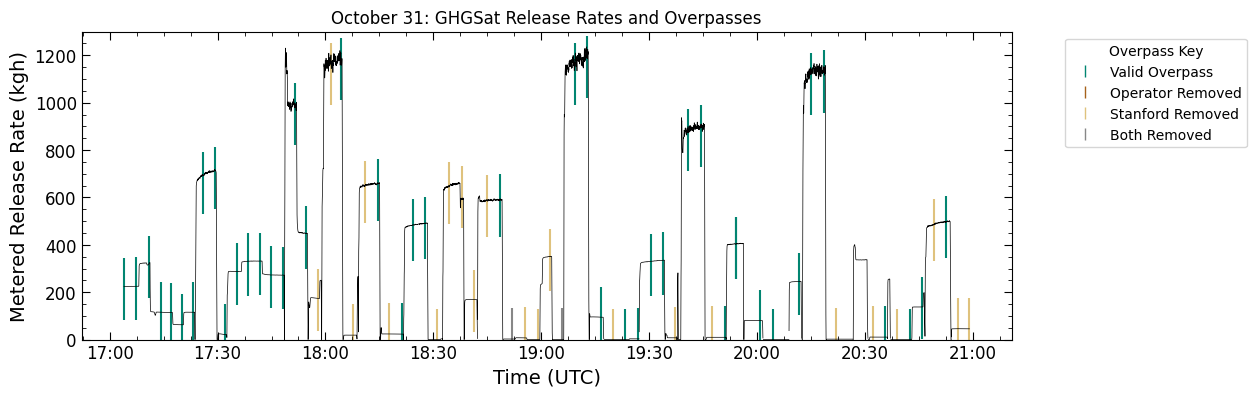

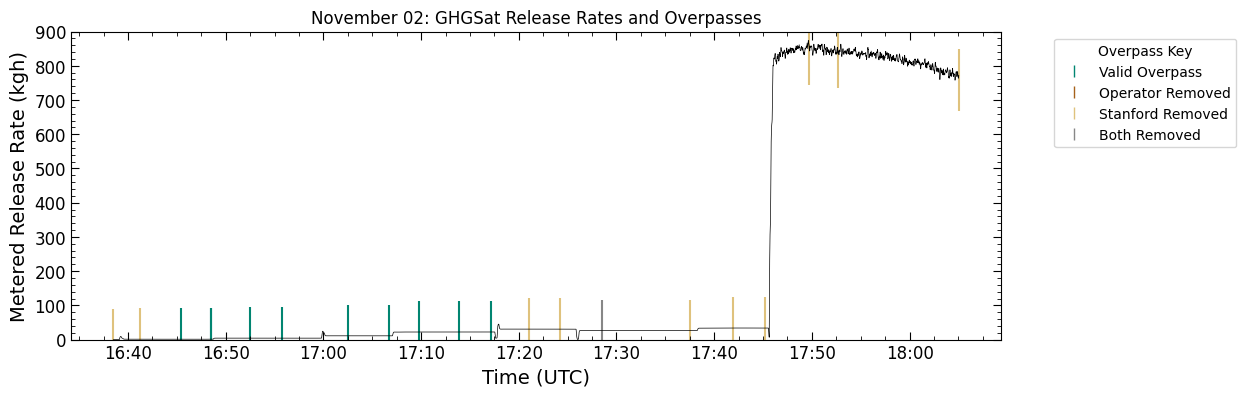

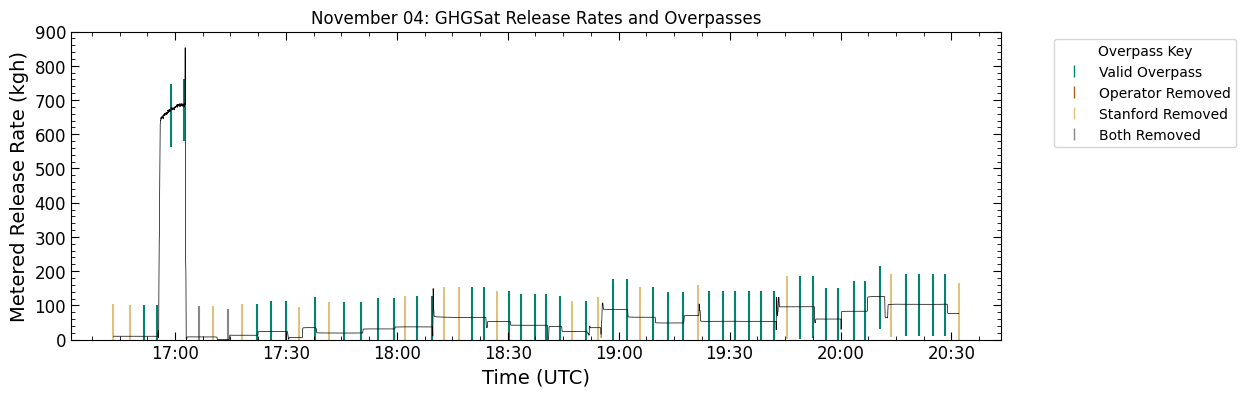

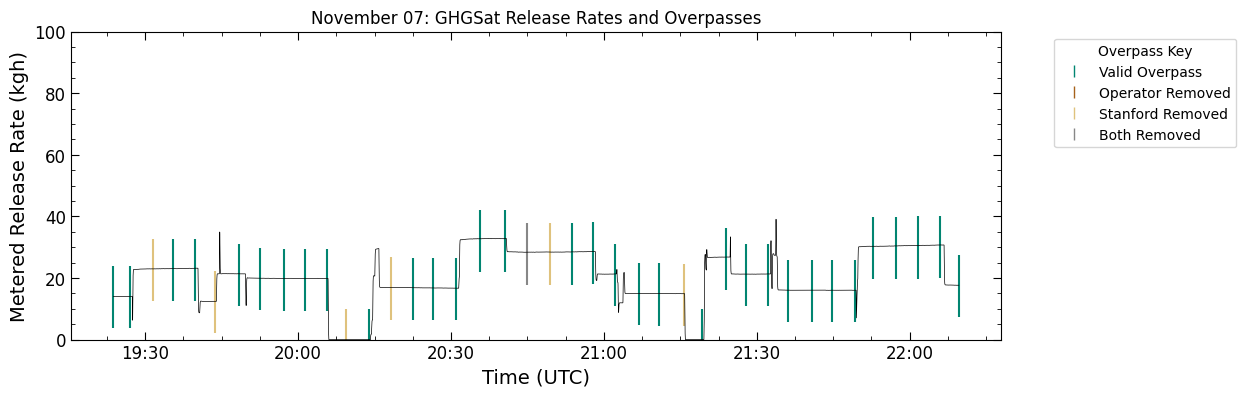

In [3]:
# GHGSat

operator = 'GHGSat'
ghg_releases = generate_daily_releases(ghg_flight_days)
plot_daily_releases(operator, ghg_flight_days, ghg_releases, 1)


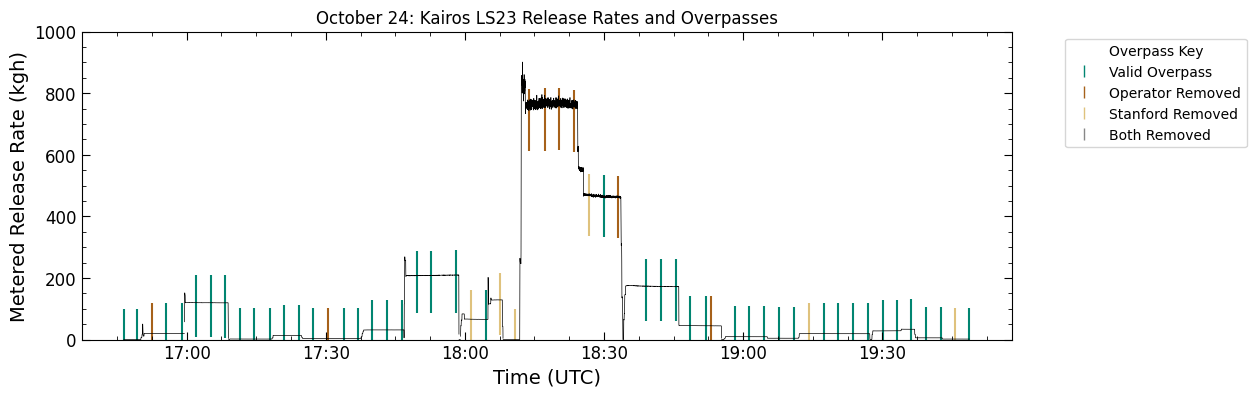

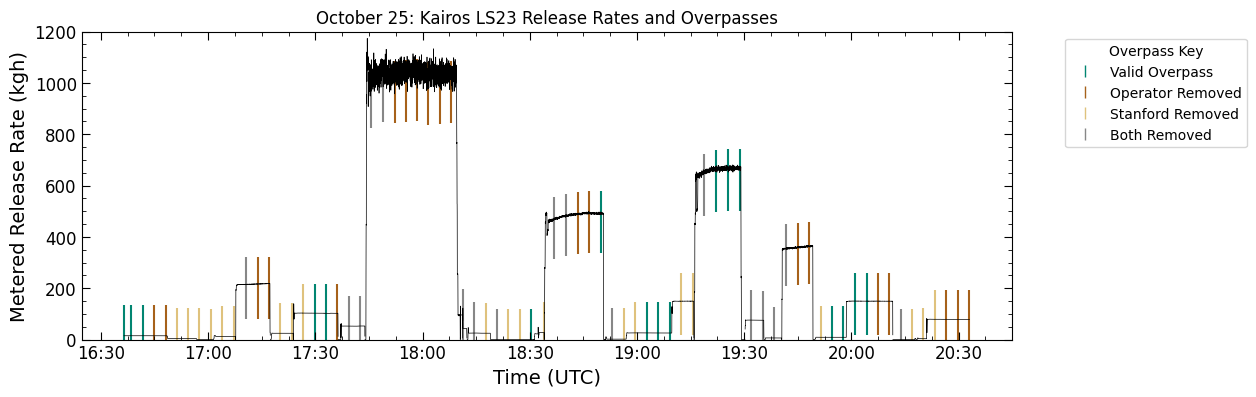

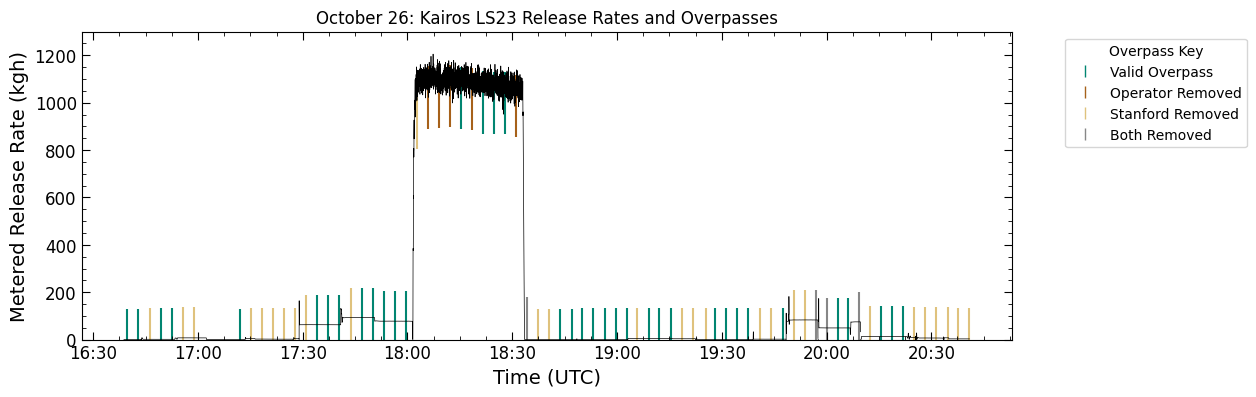

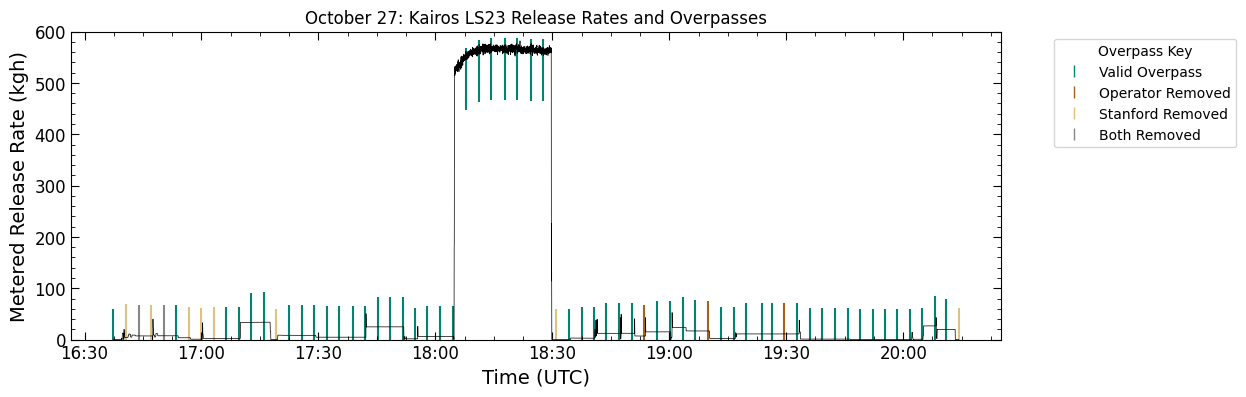

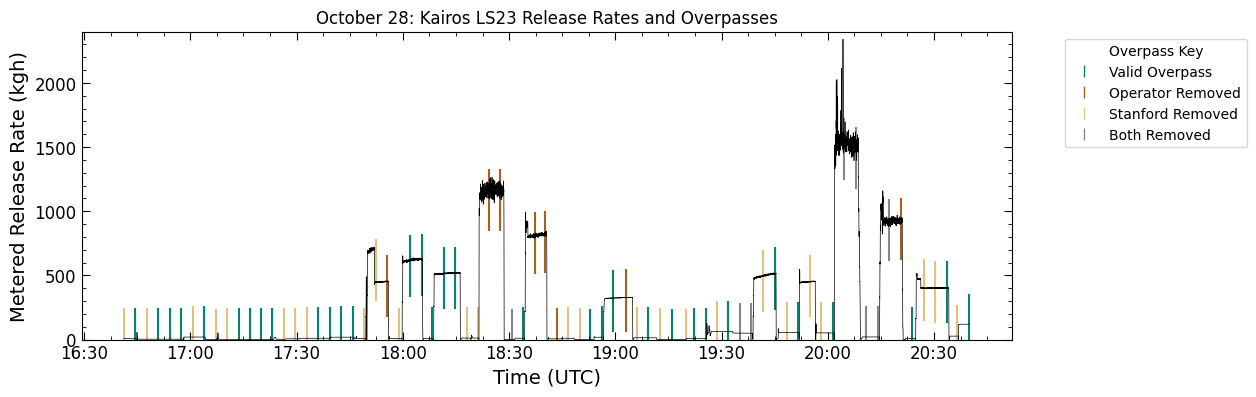

In [4]:
# Kairos

operator = 'Kairos LS23'
kairos_releases = generate_daily_releases(kairos_flight_days)
plot_daily_releases(operator, kairos_flight_days, kairos_releases, 1)